In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

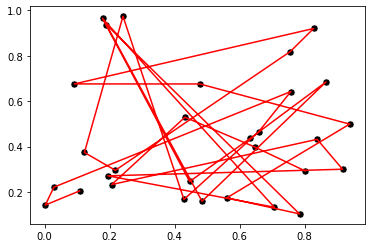

In [2]:
TOTAL_CIUDADES = 30
PUNTOS = np.random.random(size=(TOTAL_CIUDADES, 2))
sns.scatterplot(x=PUNTOS[:, 0], y=PUNTOS[:, 1], s=50, color='black')
sns.lineplot(x=PUNTOS[:, 0], y=PUNTOS[:, 1], color='red', sort=False);

### Funcion Poblacion Inicial

In [3]:
def crear_poblacion_inicial(total=5_000):
    return np.array([np.random.choice(np.arange(TOTAL_CIUDADES), size=TOTAL_CIUDADES, replace=False) for _ in range(total)])

### Funcion de Distancia entre dos Puntos

In [4]:
def distancia_entre_dos_puntos(p1, p2):
    return np.sqrt(np.sum(np.square(p1-p2)))

### Funcion Objetivo

In [5]:
def funcion_objetivo(orden):
    coordenadas = PUNTOS.copy()
    coordenadas = coordenadas[orden]
    
    total = 0
    for i in range(len(coordenadas)-1):
        p1 = coordenadas[i]
        p2 = coordenadas[i+1]
        total += distancia_entre_dos_puntos(p1, p2)
    return total

### Funcion para calificar poblacion

In [6]:
def calificar_poblacion(poblacion):
    return np.apply_along_axis(funcion_objetivo, 1, poblacion)

### Funcion Ranking Selection

In [7]:
def seleccion_rs(poblacion, evaluaciones, total_ind_seleccionados=50):
    indices_ordenados = np.argsort(evaluaciones)[::-1]
    evaluaciones = evaluaciones[indices_ordenados]
    poblacion = poblacion[indices_ordenados]
    
    orden = np.arange(len(evaluaciones))
    probabilidades = (2*orden*(2-1))/(len(evaluaciones)*(len(evaluaciones)-1))
    indices = np.random.choice(orden, p=probabilidades, size=total_ind_seleccionados)
    return poblacion[indices]

### Funcion de Recombinacion

In [8]:
def funcion_recombinacion(seleccionados, total_hijos=4):
    indices = np.random.choice(np.arange(len(seleccionados)), size=(len(seleccionados)//2, 2), replace=False)
    poblacion = []
    for i, j in indices:
        p1 = seleccionados[i]
        p2 = seleccionados[j]
        for _ in range(total_hijos):
            gen1, gen2 = np.random.randint(0, len(p1), size=2)
            inicio = min(gen1, gen2)
            final = max(gen1, gen2)
            ch_1 = list(p1[inicio:final+1])
            ch_2 = [c for c in p2 if c not in ch_1]
            poblacion.append(ch_1+ch_2)
    return np.array(poblacion)

### Funcion de Mutacion

In [9]:
def funcion_mutacion(individuo):
    x, y = np.random.choice(np.arange(len(individuo)), 2, replace=False)
    individuo[x], individuo[y] = individuo[y], individuo[x]
    return individuo

In [10]:
def mutar_poblacion(poblacion, probabilidad=0.45):
    poblacion_mutada = []
    for ind in poblacion:
        numero_aleatorio = np.random.rand()
        if numero_aleatorio < probabilidad:
            poblacion_mutada.append(funcion_mutacion(ind))
        else:
            poblacion_mutada.append(ind)
    return np.array(poblacion_mutada)

### Funcion de Elitismo

In [11]:
def extraer_n_mejores(poblacion, evaluaciones, n_mejores=10):
    indices_mejores = np.argsort(evaluaciones)[:n_mejores]
    return poblacion[indices_mejores]

In [12]:
def elitismo(poblacion, mejores):
    return np.concatenate((poblacion, mejores))

### Funciones de Informacion

In [13]:
def imprimir_mejor(poblacion, evaluaciones, generacion):
    indice_mejor = np.argmin(evaluaciones)
    mejor_individuo = poblacion[indice_mejor]
    mejor_evaluacion = evaluaciones[indice_mejor]
    print("{}. {}: {}".format(generacion + 1, ",".join(mejor_individuo.astype(str)), mejor_evaluacion))
    return mejor_evaluacion

In [14]:
def plot(orden):
    coordenadas = PUNTOS.copy()
    coordenadas = coordenadas[orden]
    sns.scatterplot(x=coordenadas[:, 0], y=coordenadas[:, 1], s=50, color='black')
    sns.lineplot(x=coordenadas[:, 0], y=coordenadas[:, 1], color='red', sort=False);

In [15]:
poblacion = crear_poblacion_inicial()
for i in range(300):
    calificaciones = calificar_poblacion(poblacion)
    mejores = extraer_n_mejores(poblacion, calificaciones)
    
    
    cal = imprimir_mejor(poblacion, calificaciones, i)
    seleccionados = seleccion_rs(poblacion, calificaciones, 2500)
    poblacion = funcion_recombinacion(seleccionados)
    poblacion = mutar_poblacion(poblacion)
    poblacion = elitismo(poblacion, mejores)

1. 18,10,14,25,19,4,2,11,12,1,24,16,15,27,28,21,7,9,6,22,29,3,17,20,0,5,26,13,8,23: 10.469729390946233
2. 18,10,14,25,19,4,2,11,12,1,24,16,15,27,28,21,7,9,6,22,29,3,17,20,0,5,26,13,8,23: 10.469729390946233
3. 18,10,14,25,19,4,2,11,12,1,24,16,15,27,28,21,7,9,6,22,29,3,17,20,0,5,26,13,8,23: 10.469729390946233
4. 23,17,2,25,14,5,13,8,19,20,16,0,7,24,12,21,28,3,9,15,1,6,27,29,4,18,10,26,11,22: 9.726300288699404
5. 23,17,2,25,14,5,13,8,19,20,16,0,7,24,12,21,28,3,9,15,1,6,27,29,4,18,10,26,11,22: 9.726300288699404
6. 18,7,24,3,21,29,28,17,8,23,13,19,4,11,2,25,16,10,6,27,9,22,26,1,0,5,14,15,12,20: 9.518574210786875
7. 19,20,16,0,7,24,12,21,28,3,9,15,1,6,27,29,14,22,13,17,25,11,10,26,5,4,23,8,2,18: 9.17568234762031
8. 19,20,16,0,7,24,12,21,28,3,9,15,1,6,27,29,14,22,13,17,25,11,10,26,5,4,23,8,2,18: 9.17568234762031
9. 16,0,7,24,12,21,28,3,9,15,1,14,11,4,6,27,29,22,10,19,5,20,25,2,17,26,8,23,18,13: 9.00523498898306
10. 16,0,7,24,12,21,28,3,9,15,1,14,11,4,6,27,29,22,10,19,5,20,25,2,17,26,8,23,18,1

81. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
82. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
83. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
84. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
85. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
86. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
87. 5,0,26,11,10,19,20,17,2,18,8,13,23,25,16,4,1,14,7,15,24,12,9,29,6,21,3,22,27,28: 5.871456166923542
88. 10,5,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.690247173121373
89. 10,5,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.690247173121373
90. 10,5,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,6,27,28,

160. 5,10,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,3,28,27,29,6,21,22: 5.628315351833806
161. 5,10,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,3,28,27,29,6,21,22: 5.628315351833806
162. 5,10,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,3,28,27,29,6,21,22: 5.628315351833806
163. 5,10,0,26,11,19,20,17,2,23,8,13,18,25,16,4,1,14,7,15,24,12,9,3,28,27,29,6,21,22: 5.628315351833806
164. 23,8,13,18,25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.469747799743443
165. 23,8,13,18,25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.469747799743443
166. 23,8,13,18,25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.469747799743443
167. 23,8,13,18,25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.469747799743443
168. 23,8,13,18,25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,6,27,28,29,21,22,3: 5.469747799743443
169. 23,8,13,18,25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,

240. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
241. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
242. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
243. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
244. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
245. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
246. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
247. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
248. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8: 4.992375303771482
249. 25,10,5,0,26,11,19,20,17,2,16,4,1,14,7,15,24,12,9,21,3,6,29

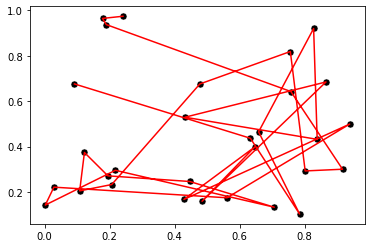

In [16]:
plot([18,10,14,25,19,4,2,11,12,1,24,16,15,27,28,21,7,9,6,22,29,3,17,20,0,5,26,13,8,23])

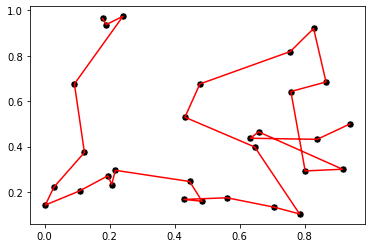

In [17]:
plot([16,4,10,25,5,0,26,11,19,20,17,2,1,14,7,15,24,12,9,21,3,6,29,28,27,22,18,23,13,8])